## CMPINF 2100 Week 11
### Review: Generate Linear Model Data
We will review important assumptions of linear modesl by generating data from a linear model.

We will use a SINGLE input that is LINEARLY related to the MEAN output or TREND.
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Define the relationship

We will use a SINGLE continous INPUT that is LINEARLY related to the TREND.

$$\mu = \beta_0 + \beta_1 \times x $$

To generate the data, we need to specify the TRUE INTERCEPT and the TRUE SLOPE. We then must calculate the TREND or AVERAGE OUTPUT for a **GIVEN INPUT** value. Then we will randomly generate OUTPUT observations around the TREND using a Gaussian random number generator.

## Visualize behavior
We must calc the TREND and so we must SPECIFY the TRUE coefficient values

In [7]:
my_intercept = 0.25
my_slope = -1.5

Create a data set of INPUT values to support VISUALIZING behavior.

In [4]:
df_viz = pd.DataFrame({"x":np.linspace(-3.5, 3.5, num=101)})

In [5]:
df_viz.head()

,x
0,-3.50
1,-3.43
2,-3.36
3,-3.29
4,-3.22


Calculate the TREND or AVG OUTPUT given the INPUT!!

In [10]:
df_viz["trend"] = my_intercept + my_slope * df_viz.x

In [11]:
df_viz

,x,trend
0,-3.50,5.500
1,-3.43,5.395
2,-3.36,5.290
3,-3.29,5.185
4,-3.22,5.080
...,...,...
96,3.22,-4.580
97,3.29,-4.685
98,3.36,-4.790
99,3.43,-4.895


Lets visualize the TREND with respect to the INPUT as a LINE CHART.

In [12]:
sns.set_style("whitegrid")

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


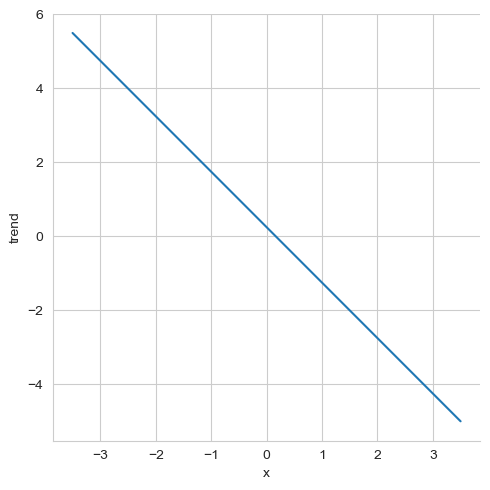

In [14]:
sns.relplot(data=df_viz, x="x", y="trend", kind="line")

plt.show()

But this week we will make more figures in matplotlib rather than Seaborn.

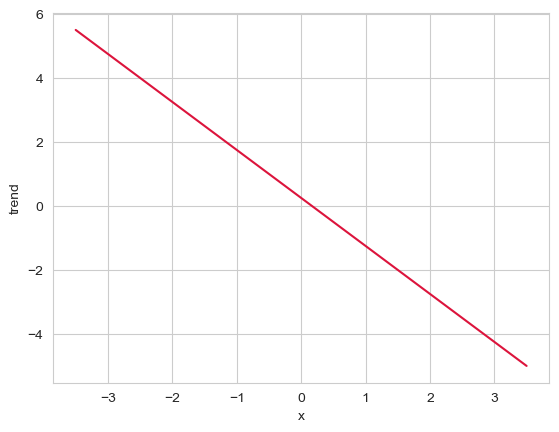

In [17]:
fig, ax = plt.subplots()

ax.plot(df_viz.x, df_viz.trend, color="crimson", linewidth=1.5)

ax.set_xlabel("x")
ax.set_ylabel("trend")

plt.show()

We will now visualize the VARIATION around the TREND. Or, we will visualize the UNCERTAINTY of a single output measurement around the average output!!!

The LIKELIHOOD of an OUTPUT around the TREND is a GAUSSIAN distribution. The variation of a Gaussian is specified by the STANDARD DEVIATION of SIGMA. 

We need to specify the SIGMA that controls the level of variation around the trend.

In [18]:
my_sigma = 1.25

Last week we RANDOMLY generated MANY replications of output around the trend to show the CONSTANT variation around the the TREND!!

This week, we will summarize the level of variation using **RIBBONS**.

RIBBONS are defined by LOWER and UPPER BOUNDS that correspond to LOWER and UPPER BOUNDS of INTERVALS.

Because the linear models has a GAUSSIAN likelihood or distribution, the UNCERTAINTY can be easily summarized as the num of stds around the mean!!!

We will use the $\pm1 \sigma$ and the $\pm2 \sigma$ intervals around the mean. These correspond to the 68% and 95% uncertainty intervals. 

In [19]:
df_viz["obs_lwr_68"] = df_viz.trend - my_sigma
df_viz["obs_upr_68"] = df_viz.trend + my_sigma

In [20]:
df_viz

,x,trend,obs_lwr_68,obs_upr_68
0,-3.50,5.500,4.250,6.750
1,-3.43,5.395,4.145,6.645
2,-3.36,5.290,4.040,6.540
3,-3.29,5.185,3.935,6.435
4,-3.22,5.080,3.830,6.330
...,...,...,...,...
96,3.22,-4.580,-5.830,-3.330
97,3.29,-4.685,-5.935,-3.435
98,3.36,-4.790,-6.040,-3.540
99,3.43,-4.895,-6.145,-3.645


In [21]:
df_viz["obs_lwr_95"] = df_viz.trend - 2*my_sigma
df_viz["obs_upr_95"] = df_viz.trend + 2*my_sigma

In [22]:
df_viz

,x,trend,obs_lwr_68,obs_upr_68,obs_lwr_95,obs_upr_95
0,-3.50,5.500,4.250,6.750,3.000,8.000
1,-3.43,5.395,4.145,6.645,2.895,7.895
2,-3.36,5.290,4.040,6.540,2.790,7.790
3,-3.29,5.185,3.935,6.435,2.685,7.685
4,-3.22,5.080,3.830,6.330,2.580,7.580
...,...,...,...,...,...,...
96,3.22,-4.580,-5.830,-3.330,-7.080,-2.080
97,3.29,-4.685,-5.935,-3.435,-7.185,-2.185
98,3.36,-4.790,-6.040,-3.540,-7.290,-2.290
99,3.43,-4.895,-6.145,-3.645,-7.395,-2.395


Visualize the UNCERTAINTY or LEVEL of VARIATION using RIBBONS.

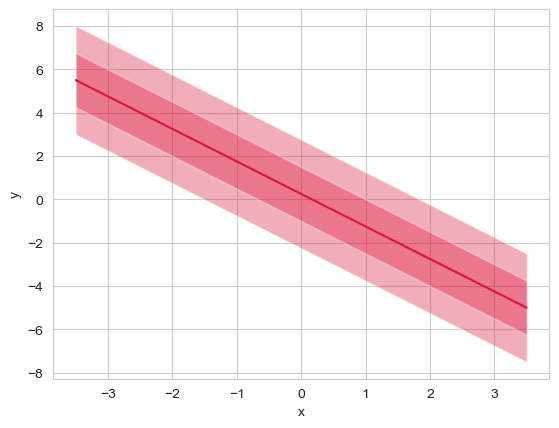

In [29]:
fig, ax = plt.subplots()

## TRUE TREND
ax.plot(df_viz.x, df_viz.trend, color="crimson", linewidth=1.5)

## TRUE variation around the TREND - showing 2 intervals
# 2 sigma interval
ax.fill_between(df_viz.x, df_viz.obs_lwr_95, df_viz.obs_upr_95, facecolor="crimson", alpha=0.35)

# 1 sigma interval
ax.fill_between(df_viz.x, df_viz.obs_lwr_68, df_viz.obs_upr_68, facecolor="crimson", alpha=0.35)


# set labels
ax.set_xlabel("x")
ax.set_ylabel("y")

# show the plot
plt.show()

## Generate random output data

Generate a small number of random output obs at specific input values.

For simplicity, lets treat the input as NOT random. The input will have values UNIFORMLY spaced between a lower bound and upper bound.

Specifically, lets use 9 input location between -3 and 3.

In [30]:
df = pd.DataFrame({"x": np.linspace(-3, 3, num=9)})

In [32]:
df

,x
0,-3.00
1,-2.25
2,-1.50
3,-0.75
4,0.00
5,0.75
6,1.50
7,2.25
8,3.00


Next, we need to calc the MEAN OUTPUT or TREND given the INPUT values.

In [33]:
df["trend"] = my_intercept + my_slope*df.x

In [35]:
df

,x,trend
0,-3.00,4.750
1,-2.25,3.625
2,-1.50,2.500
3,-0.75,1.375
4,0.00,0.250
5,0.75,-0.875
6,1.50,-2.000
7,2.25,-3.125
8,3.00,-4.250


The output are RANDOMLY distributed around the MEAN as a GAUSSIAN distribution.

In [36]:
rg = np.random.default_rng(2100)

In [37]:
df["y"] = rg.normal(loc=df.trend, scale=my_sigma, size=df.shape[0])

In [38]:
df

,x,trend,y
0,-3.00,4.750,6.030315
1,-2.25,3.625,1.457911
2,-1.50,2.500,2.388383
3,-0.75,1.375,0.007815
4,0.00,0.250,0.651244
5,0.75,-0.875,-2.254007
6,1.50,-2.000,-2.969992
7,2.25,-3.125,-3.537097
8,3.00,-4.250,-6.063282


Visualize the randomly generated output around the TREND.

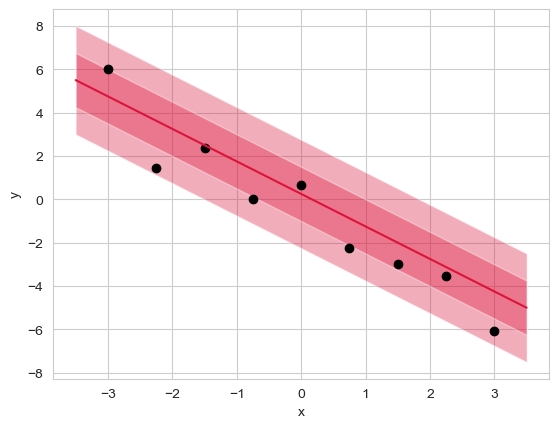

In [40]:
fig, ax = plt.subplots()

## TRUE TREND
ax.plot(df_viz.x, df_viz.trend, color="crimson", linewidth=1.5)

## TRUE variation around the TREND - showing 2 intervals
# 2 sigma interval
ax.fill_between(df_viz.x, df_viz.obs_lwr_95, df_viz.obs_upr_95, facecolor="crimson", alpha=0.35)

# 1 sigma interval
ax.fill_between(df_viz.x, df_viz.obs_lwr_68, df_viz.obs_upr_68, facecolor="crimson", alpha=0.35)

# include the randomly generate small data set as a scatter plot
ax.scatter(df.x, df.y, color="k")

# set labels
ax.set_xlabel("x")
ax.set_ylabel("y")

# show the plot
plt.show()

Lets save this small dataset set so that we can ultimately FIT models to it.

But for book keeping purposes, lets store the TRUE coefficients and SIGMA that generated data.

In [41]:
df["true_intercept"] = my_intercept

In [42]:
df["true_slope"] = my_slope

In [43]:
df["true_sigma"] = my_sigma

In [44]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


Save dataframe to CSV file.

In [45]:
df.to_csv("week_11_linear_data.csv", index=False)

Lets read back the data to confirm we saved it correctly.

In [46]:
pd.read_csv("week_11_linear_data.csv")

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25
